# PERCEPTRON


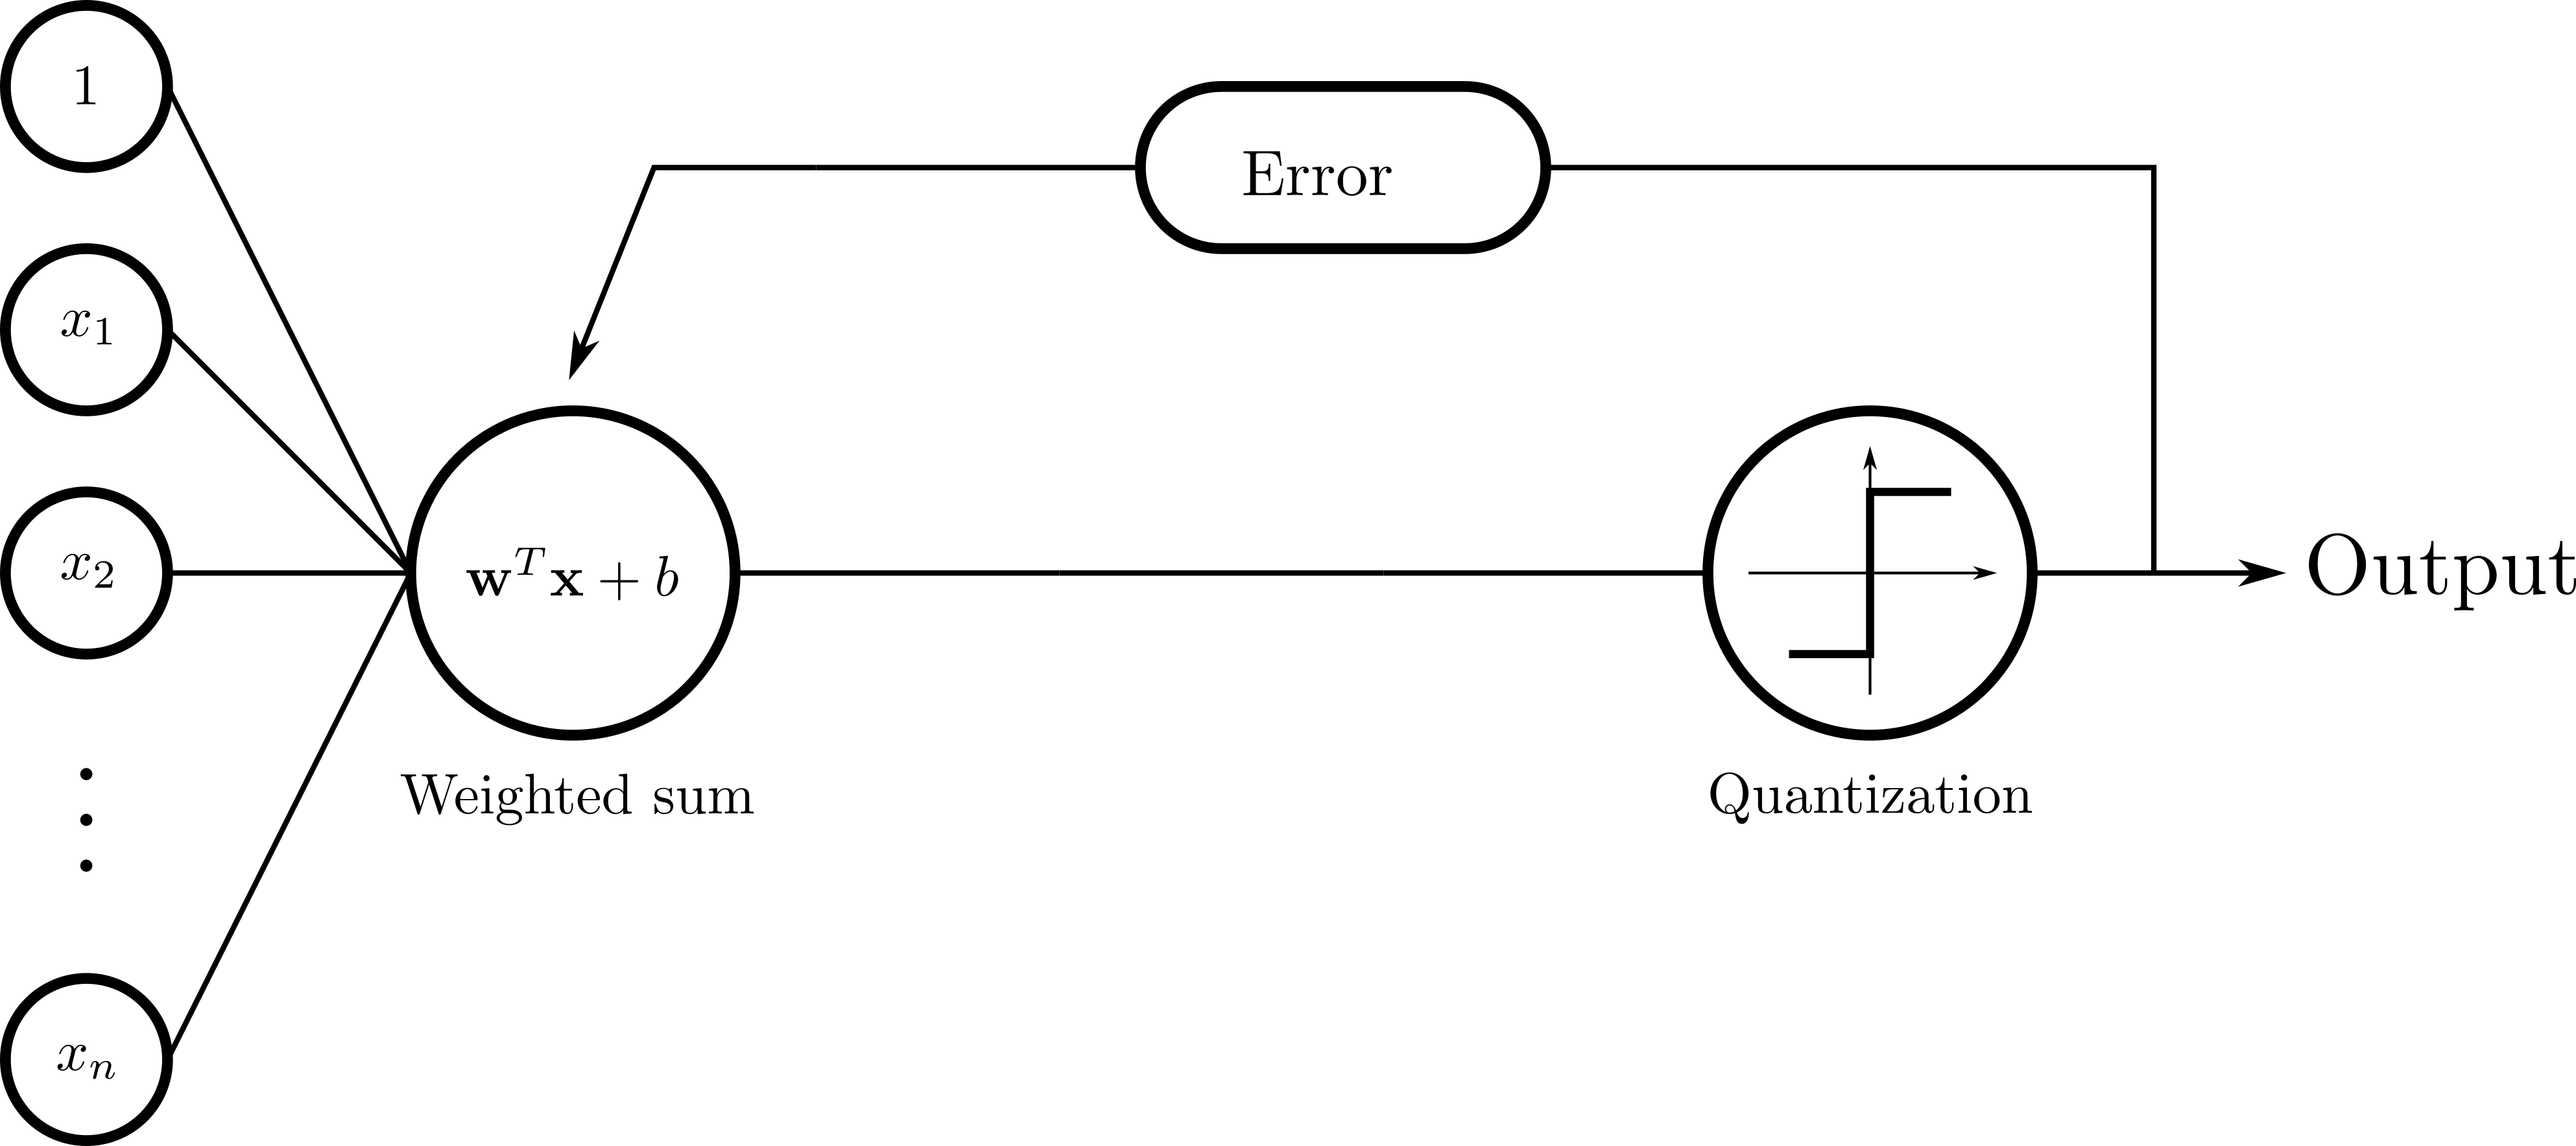

Separar datos aleatorios linealmente, donde la separación esté dada por la ecuación:

> *f(x) = 2x*



Librerías a utilizar:

In [3]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

Datos aleatorios para crear las coordenadas:

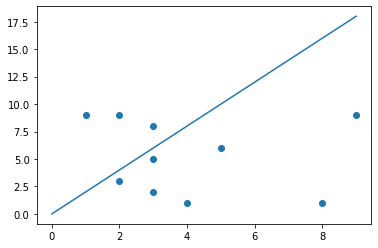

In [5]:
coords_x = [(random.randint(0,10)) for _ in range(10)]
coords_y = [(random.randint(0,10)) for _ in range(10)]
plt.scatter(coords_x,coords_y)
plt.plot(np.arange(10),2*np.arange(10))

In [6]:
print(coords_x)
print(coords_y)

[4, 3, 5, 3, 2, 3, 8, 1, 9, 2]
[1, 8, 6, 5, 9, 2, 1, 9, 9, 3]


Los números aleatorios, serán combinados en un DataFrame:

In [7]:
coords_xy = pd.DataFrame(coords_x)
df_y = pd.DataFrame(coords_y)
coords_xy['1'] = df_y
coords_xy

,0,1
0,4,1
1,3,8
2,5,6
3,3,5
4,2,9
5,3,2
6,8,1
7,1,9
8,9,9
9,2,3


A continuación, se hará una evaluación previa de los datos para que se cumpla el requerimiento de la separación por la función: 
*f(x) = 2x*.
De ésta manera se puede visualizar cuáles datos corresponden a cuál grupo para la separación de las coordenadas.

In [8]:
coords_xy['r'] = coords_xy['1'] > coords_xy[0]*2 
coords_xy

,0,1,r
0,4,1,False
1,3,8,True
2,5,6,False
3,3,5,False
4,2,9,True
5,3,2,False
6,8,1,False
7,1,9,True
8,9,9,False
9,2,3,False


Cambio de valores booleanos a valores enteros:

In [9]:
coords_xy['r'] = coords_xy['r'].astype(int)
coords_xy

,0,1,r
0,4,1,0
1,3,8,1
2,5,6,0
3,3,5,0
4,2,9,1
5,3,2,0
6,8,1,0
7,1,9,1
8,9,9,0
9,2,3,0


Se selecciona un bias = 1, en todas las entradas para iniciar el sistema.

In [10]:
bias = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
coords_xy['bias'] = bias
print(coords_xy)

   0  1  r  bias
0  4  1  0     1
1  3  8  1     1
2  5  6  0     1
3  3  5  0     1
4  2  9  1     1
5  3  2  0     1
6  8  1  0     1
7  1  9  1     1
8  9  9  0     1
9  2  3  0     1


In [17]:
coords_xy = coords_xy[['bias',0,'1','r']]
coords_xy

,bias,0,1,r
0,1,4,1,0
1,1,3,8,1
2,1,5,6,0
3,1,3,5,0
4,1,2,9,1
5,1,3,2,0
6,1,8,1,0
7,1,1,9,1
8,1,9,9,0
9,1,2,3,0


In [18]:
data = np.asarray(coords_xy, dtype= 'float32')
data

array([[1., 4., 1., 0.],
       [1., 3., 8., 1.],
       [1., 5., 6., 0.],
       [1., 3., 5., 0.],
       [1., 2., 9., 1.],
       [1., 3., 2., 0.],
       [1., 8., 1., 0.],
       [1., 1., 9., 1.],
       [1., 9., 9., 0.],
       [1., 2., 3., 0.]], dtype=float32)

Text(0, 0.5, 'X2')

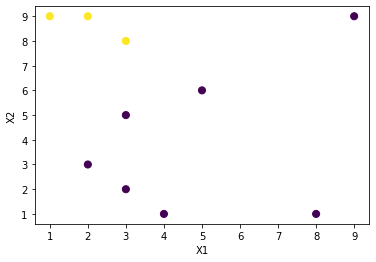

In [20]:
plt.scatter(data[: ,1], data[: ,2], c=data[: ,3], s=50, cmap='viridis')
plt.xlabel("X1")
plt.ylabel("X2")

## Definición de funciones

### Funcion: activate

In [21]:
def activate(inputs, weights):
    activation=0.0
    for i,w in zip(inputs,weights):
        activation += i*w 
    return 1.0 if activation>=0.0 else 0.0

In [22]:
weights = np.array([0.2,0.2,0.2])
activate(data[0],weights)

1.0

In [23]:
weights

array([0.2, 0.2, 0.2])

### Función: training

In [28]:
def training(dataset,l_rate,n_epoch):
    weights = [np.random.uniform(0, 1) for i in range(len(dataset[0]))]
    print("initial weights  ",weights)
    
    err = np.array([])
    itera = np.array([])

    for epoch in range(n_epoch):
        sum_error = 0.0
        for i in range(len(dataset)): 
            prediction =  activate(dataset[i][:-1],weights)
            error = dataset[i][-1] - prediction
            print("error row ",error)
            sum_error += error**2
            for j in range(len(weights)):                 # calculate new weight for each node
                weights[j] = weights[j]+(l_rate*error*dataset[i][j])
                
                
        print("Iteration # ",epoch," Error = ",sum_error," W[0] ",weights[0], "W[1] ",weights[1], "W[2] ",weights[2])
        print("==================================================")
        plt.scatter(data[:, 1], data[:, 2], c=data[:,3], s=50, cmap='viridis')
        plot_x = np.array([np.min(data[:, 1] - 0.2), np.max(data[:, 2]+0.2)])
        plot_y =  -1 / weights[2] * (weights[1] * plot_x + weights[0])
        plot_y = np.reshape(plot_y, [2, -1])
        plot_y = np.squeeze(plot_y)
        plt.plot(plot_x, plot_y, color='k', linewidth=2)
        plt.xlim([-1, 11]); plt.ylim([-0.2, 15.25]);
        #plt.text(0.425, 1.05, 'AND logic', fontsize=14)
        #plt.xticks([0.0, 0.5, 1.0]); plt.yticks([0.0, 0.5, 1.0])
        plt.show()
        
        err = np.append(err,sum_error)
        itera = np.append(itera,epoch)
        
        # si el error total en la muestra es igual a 0 sale del loop de iteraciones 
        if(sum_error == 0.0): 
            print("errores ",err, "iteraciones ",itera)
            plt.plot(itera,err,'o-')
            plt.xlabel("Epoch")
            plt.ylabel("SSE")
            break

        
        
    return weights

initial weights   [0.525969275436774, 0.6212131587458187, 0.6878080606853249, 0.4735154251837501]
error row  -1.0
error row  0.0
error row  -1.0
error row  0.0
error row  1.0
error row  -1.0
error row  0.0
error row  0.0
error row  -1.0
error row  0.0
Iteration #  0  Error =  5.0  W[0]  0.225969275436774 W[1]  -1.2787868412541814 W[2]  -0.21219193931467528


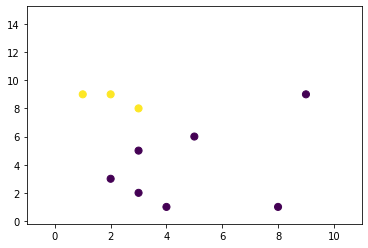

error row  0.0
error row  1.0
error row  0.0
error row  -1.0
error row  1.0
error row  0.0
error row  0.0
error row  0.0
error row  0.0
error row  -1.0
Iteration #  1  Error =  4.0  W[0]  0.225969275436774 W[1]  -1.2787868412541814 W[2]  0.6878080606853247


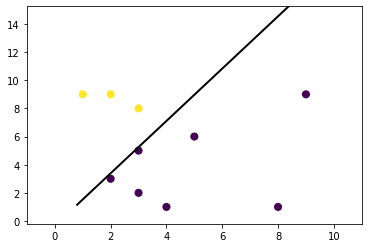

error row  0.0
error row  0.0
error row  0.0
error row  0.0
error row  0.0
error row  0.0
error row  0.0
error row  0.0
error row  0.0
error row  0.0
Iteration #  2  Error =  0.0  W[0]  0.225969275436774 W[1]  -1.2787868412541814 W[2]  0.6878080606853247


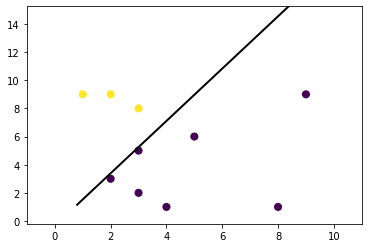

errores  [5. 4. 0.] iteraciones  [0. 1. 2.]


[0.225969275436774, -1.2787868412541814, 0.6878080606853247, 0.77351542518375]

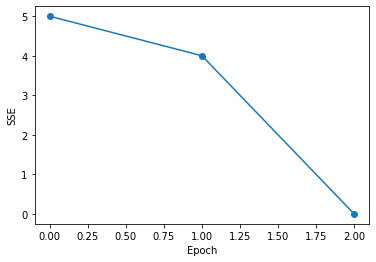

In [29]:
training(data,0.1,10)